In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.metrics import mean_squared_error
style.use('ggplot')

In [13]:
df = pd.read_csv('../datasets/airpassengers_evaluation_sample.csv', delimiter='\t', index_col=0)
df.head()

,GDP,Population,Passengers,Model1_Prediction,Model2_Prediction,Model3_Prediction,Model4_Prediction
Year,,,,,,,
2008,14.72,304.09,701.78,710,701,850,750
2009,14.42,306.77,679.42,650,670,450,750
2010,14.96,309.34,720.50,700,715,1000,750
2011,15.52,311.64,730.80,750,735,550,750
2012,16.16,313.99,736.70,769,740,700,750


In [20]:
models = ['Model1_Prediction', 'Model2_Prediction', 'Model3_Prediction', 'Model4_Prediction']


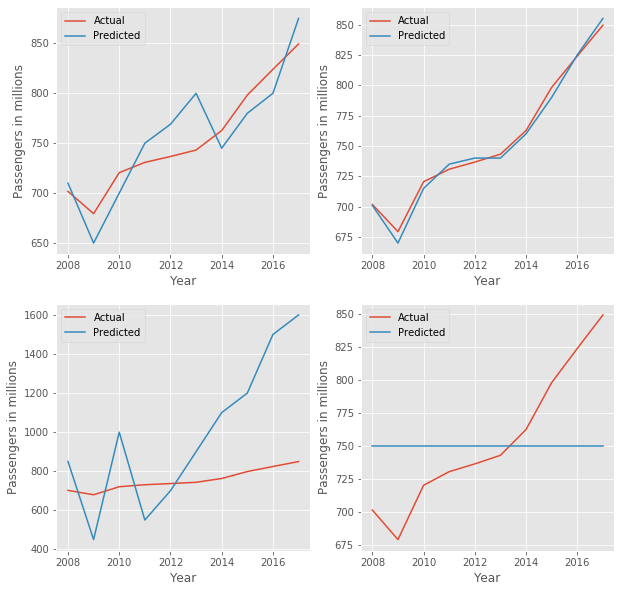

In [21]:
# evaluate datasets visually 
plt.figure(figsize=(10,10))

# model 1
plt.subplot(221)
plt.plot(df['Passengers'], label='Actual')
plt.plot(df['Model1_Prediction'], label='Predicted')
plt.xlabel('Year')
plt.ylabel('Passengers in millions')
plt.legend()

# model 2
plt.subplot(222)
plt.plot(df['Passengers'], label='Actual')
plt.plot(df['Model2_Prediction'], label='Predicted')
plt.xlabel('Year')
plt.ylabel('Passengers in millions')
plt.legend()

# model 3
plt.subplot(223)
plt.plot(df['Passengers'], label='Actual')
plt.plot(df['Model3_Prediction'], label='Predicted')
plt.xlabel('Year')
plt.ylabel('Passengers in millions')
plt.legend()

# model 4
plt.subplot(224)
plt.plot(df['Passengers'], label='Actual')
plt.plot(df['Model4_Prediction'], label='Predicted')
plt.xlabel('Year')
plt.ylabel('Passengers in millions')
plt.legend()
plt.show()

In [23]:
# RMSE - root mean square error

for model in models:
    print(model.split('_')[0])
    mse = mean_squared_error(df['Passengers'], df[model])
    print(f'Mean squared error {mse}')
    print(f'Root mean squared error {mse ** 0.5}')
    print()

Model1
Mean squared error 787.3827800000004
Root mean squared error 28.060341765559457

Model2
Mean squared error 26.53678
Root mean squared error 5.151386221202988

Model3
Mean squared error 150686.81277999998
Root mean squared error 388.18399346186334

Model4
Mean squared error 2661.81278
Root mean squared error 51.59275898805956



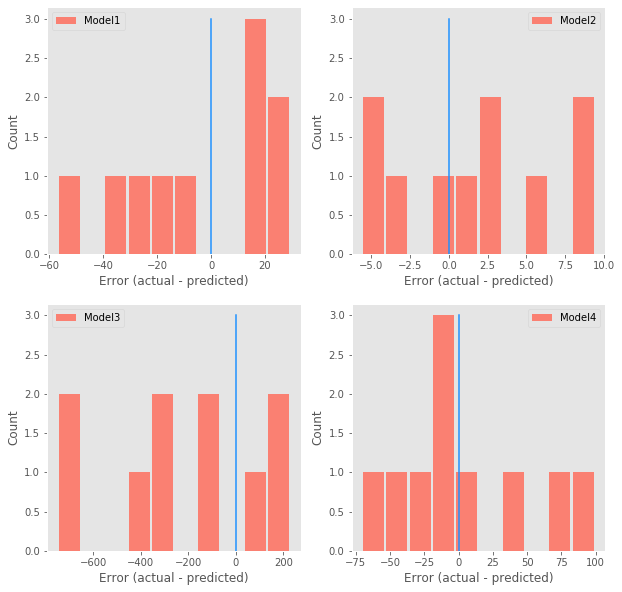

In [31]:
# residual histograms
plt.figure(figsize=(10,10))

for i, model in enumerate(models):
    plt.subplot(2,2,i+1)
    residuals = df['Passengers'] - df[model]
    plt.hist(residuals, label=model.split('_')[0], rwidth=0.9, color='salmon')
    plt.plot([0,0],[0,3], color='dodgerblue')
    plt.xlabel('Error (actual - predicted)')
    plt.ylabel('Count')
    plt.grid()
    plt.legend()
    